# Notebook all about Satellite Launches

Satcat dataset: https://celestrak.org/satcat/search.php

```
OBJECT_NAME		Satellite Name(s)

    R/B(1) = Rocket body, first stage
    R/B(2) = Rocket body, second stage
    DEB = Debris
    PLAT = Platform
    Items in parentheses are alternate names
    Items in brackets indicate type of object
    (e.g., BREEZE-M DEB [TANK] = tank)
    An ampersand (&) indicates two or more objects are attached
```

```
OBJECT_ID		International Designator (YYYY-NNNAAA)

    Launch year (4 digits)
    Launch of the year (3 digits)
    Piece of the launch (1-3 alphabetic characters, excluding I and O)
```

```
NORAD_CAT_ID	NORAD Catalog Number
```

```
OBJECT_TYPE		Object type

    PAY = Payload
    R/B = Rocket body
    DEB = Other debris
    UNK = Unknown
```

```
OPS_STATUS_CODE	Operational Status Code
```

```
OWNER			Ownership
```

```
LAUNCH_DATE		Launch Date [year-month-day] (ISO 8601)
```

```
LAUNCH_SITE		Launch Site
```

```
DECAY_DATE		Decay Date, if applicable [year-month-day] (ISO 8601)
```

```
PERIOD			Orbital period [minutes]; null if no data available
```

```
INCLINATION		Inclination [degrees]; null if no data available
```

```
APOGEE			Apogee Altitude [kilometers]; null if no data available
```

```
PERIGEE			Perigee Altitude [kilometers]; null if no data available
```

```
RCS				Radar Cross Section [meters2]; null if no data available
```

```
DATA_STATUS_CODE	Data status code; blank otherwise

    NCE = No Current Elements
    NIE = No Initial Elements
    NEA = No Elements Available
```

```
ORBIT_CENTER	Orbit center

    AS = Asteroid
    CO = Comet
    EA = Earth
    ELx = Earth Lagrange (EL1 = Earth L1, EL2 = Earth L2)
    EM = Earth-Moon Barycenter
    JU = Jupiter
    MA = Mars
    ME = Mercury
    MO = Moon (Earth)
    NE = Neptune
    PL = Pluto
    SA = Saturn
    SS = Solar System Escape
    SU = Sun
    UR = Uranus
    VE = Venus
    NORAD_CAT_ID for docked objects
```

```
ORBIT_TYPE		Orbit type

    ORB = Orbit
    LAN = Landing
    IMP = Impact
    DOC = Docked to another object in the SATCAT
    R/T = Roundtrip
```

In [22]:
# Helper Functions

def classify_orbit(altitude_km):
    """Classifies orbit based on altitude.
    """
    if(altitude_km < 2000):
        return "LEO" # Low Earth Orbit
    elif(altitude_km < 35786):
        return "MEO" # Medium Earth Orbit
    else:
        return "GSO" # Geosynchronous Orbit

In [23]:
import pandas as pd

# Make sure to execute `download_satcat.sh` first
df = pd.read_csv("satcat.csv")

# Filter to Earth Orbit Center
df = df[df["ORBIT_CENTER"] == "EA"]

# Only consider satellite with payload
df = df[df["OBJECT_TYPE"] == "PAY"]

# Convert Dates to a pandas timestamp
df["LAUNCH_DATE"] = pd.to_datetime(df["LAUNCH_DATE"], format='%Y-%m-%d')
df["DECAY_DATE"] = pd.to_datetime(df["DECAY_DATE"], format='%Y-%m-%d')

# Create new column called LAUNCH_YEAR
df["LAUNCH_YEAR"] = df.apply(lambda row: row["LAUNCH_DATE"].year, axis=1)

# Create Orbit Class distrinction
df["ORBIT_CLASS"] = df.apply(lambda row: classify_orbit(row["APOGEE"]), axis=1)

# Create Object Class
df["OBJECT_CLASS"] = df.apply(lambda row: row["OBJECT_NAME"].split(" ")[0].split("-")[0], axis=1)

df

,OBJECT_NAME,OBJECT_ID,NORAD_CAT_ID,OBJECT_TYPE,OPS_STATUS_CODE,OWNER,LAUNCH_DATE,LAUNCH_SITE,DECAY_DATE,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS,DATA_STATUS_CODE,ORBIT_CENTER,ORBIT_TYPE,LAUNCH_YEAR,ORBIT_CLASS,OBJECT_CLASS
1,SPUTNIK 1,1957-001B,2,PAY,D,CIS,1957-10-04,TYMSC,1958-01-03,96.10,65.00,1080.0,64.0,NaN,NaN,EA,IMP,1957,LEO,SPUTNIK
2,SPUTNIK 2,1957-002A,3,PAY,D,CIS,1957-11-03,TYMSC,1958-04-14,103.74,65.33,1659.0,211.0,0.080,NaN,EA,IMP,1957,LEO,SPUTNIK
3,EXPLORER 1,1958-001A,4,PAY,D,US,1958-02-01,AFETR,1970-03-31,88.48,33.15,215.0,183.0,NaN,NaN,EA,IMP,1958,LEO,EXPLORER
4,VANGUARD 1,1958-002B,5,PAY,NaN,US,1958-03-17,AFETR,NaT,132.72,34.25,3832.0,649.0,0.122,NaN,EA,ORB,1958,MEO,VANGUARD
5,EXPLORER 3,1958-003A,6,PAY,D,US,1958-03-26,AFETR,1958-06-28,103.60,33.50,1739.0,117.0,NaN,NaN,EA,IMP,1958,LEO,EXPLORER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53992,OBJECT A,2022-133A,54042,PAY,+,PRC,2022-10-14,XICLF,NaT,94.45,35.00,498.0,486.0,NaN,NaN,EA,ORB,2022,LEO,OBJECT
53993,OBJECT B,2022-133B,54043,PAY,+,PRC,2022-10-14,XICLF,NaT,94.44,35.00,498.0,485.0,NaN,NaN,EA,ORB,2022,LEO,OBJECT
53994,OBJECT C,2022-133C,54044,PAY,+,PRC,2022-10-14,XICLF,NaT,94.44,35.00,498.0,485.0,NaN,NaN,EA,ORB,2022,LEO,OBJECT
53998,OBJECT A,2022-134A,54048,PAY,+,EUTE,2022-10-15,AFETR,NaT,1067.06,26.81,56050.0,374.0,NaN,NaN,EA,ORB,2022,GSO,OBJECT


# OWNER statistics

also see: https://celestrak.org/satcat/sources.php

In [3]:
def plot_sats(pie_df, title="", cutoff=800):
    df_count = pie_df.groupby(["OWNER"], as_index=False).count().filter(["OWNER", "OBJECT_ID"])
    df_count["OWNER_NEW"] = df_count.apply(lambda row: row["OWNER"] if row["OBJECT_ID"] > cutoff else "OTHER", axis=1)
    df_count.rename(columns = {"OBJECT_ID": "OWNED_SATELLITES"}, inplace=True)
    df_count.groupby(["OWNER_NEW"]).sum().plot(kind="bar", title=title, y="OWNED_SATELLITES")
    

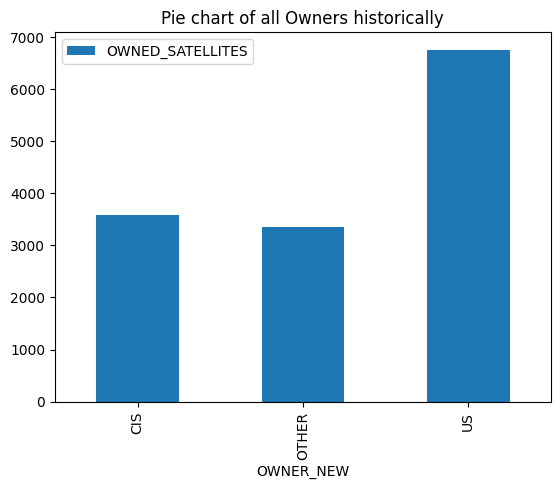

In [4]:
plot_sats(df, title="Pie chart of all Owners historically", cutoff=800)

## Charts of Number of Satellites of the Owners throughout the years

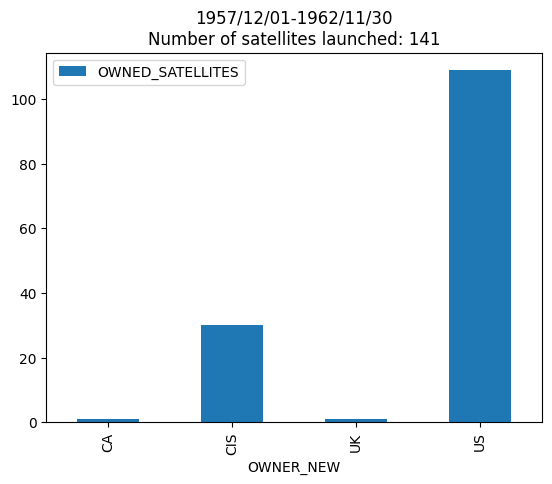

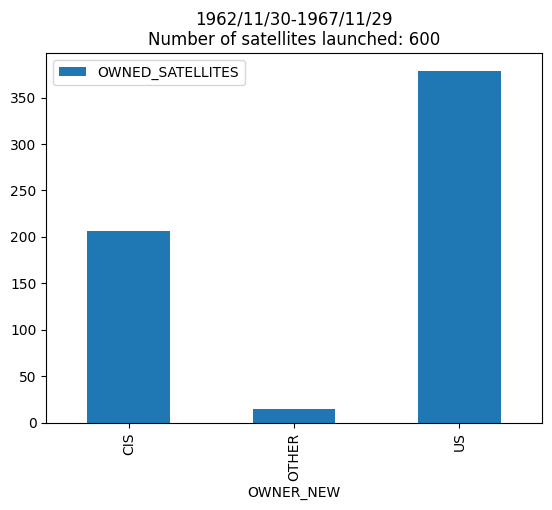

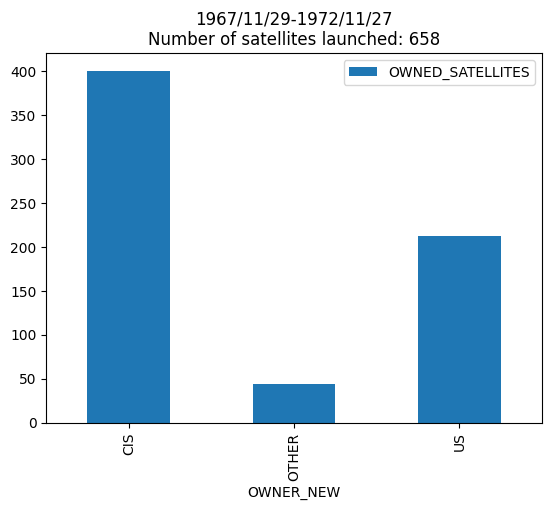

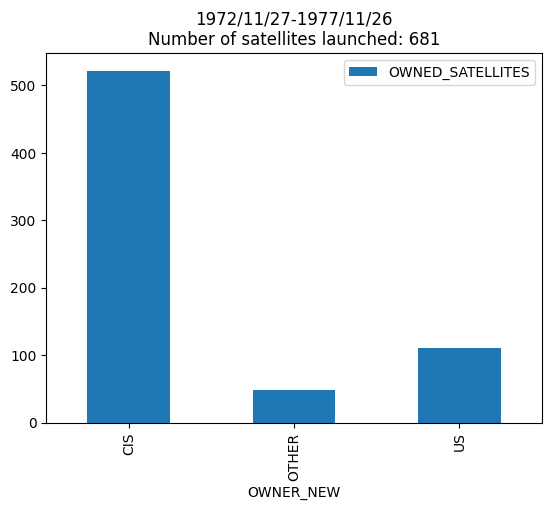

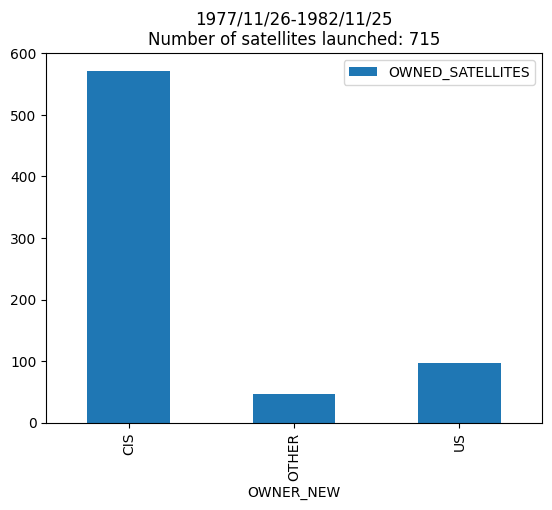

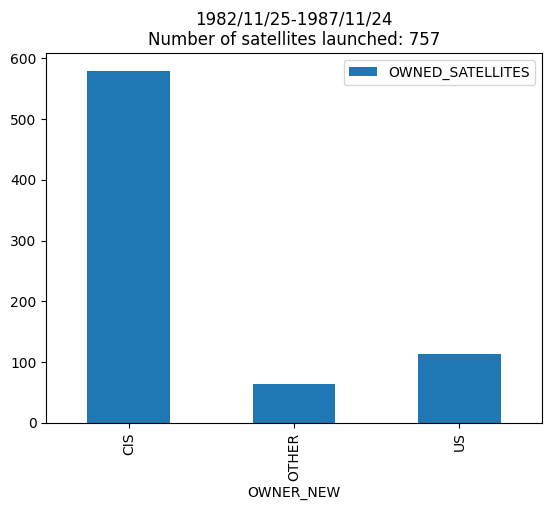

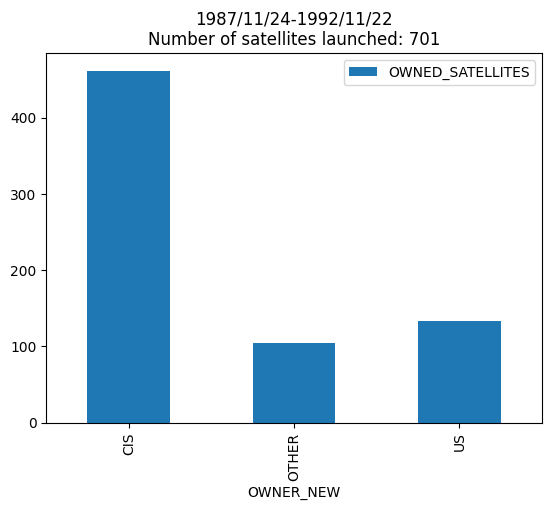

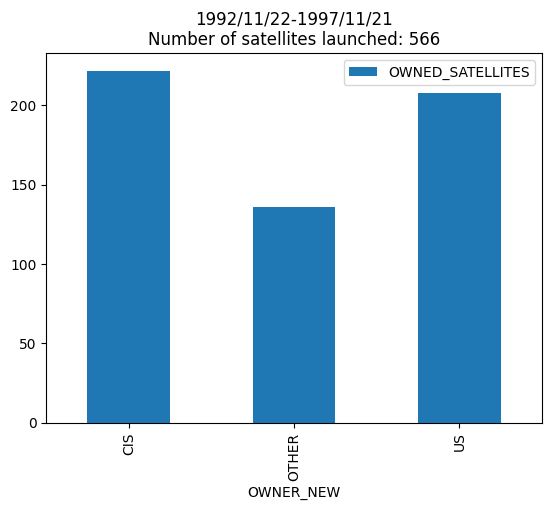

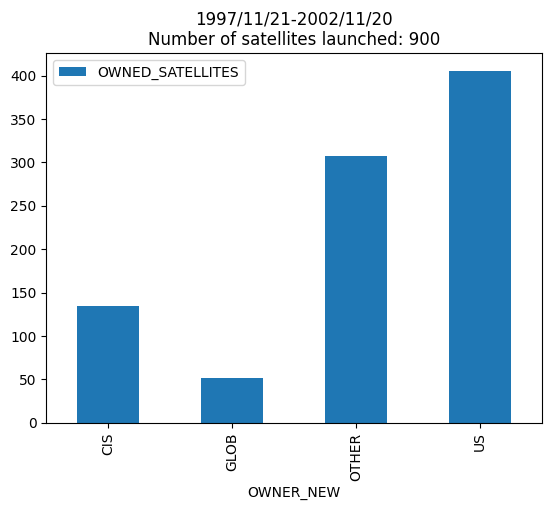

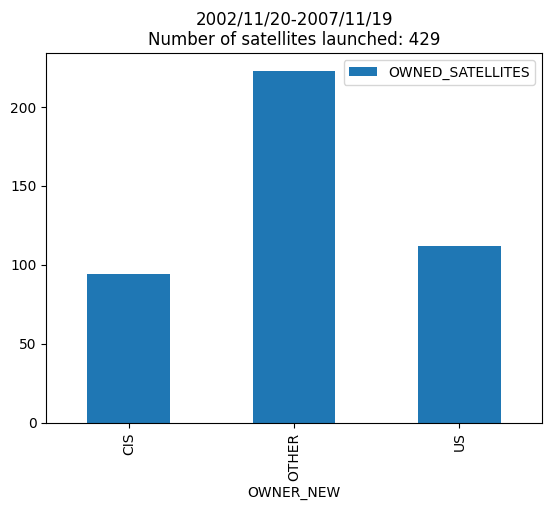

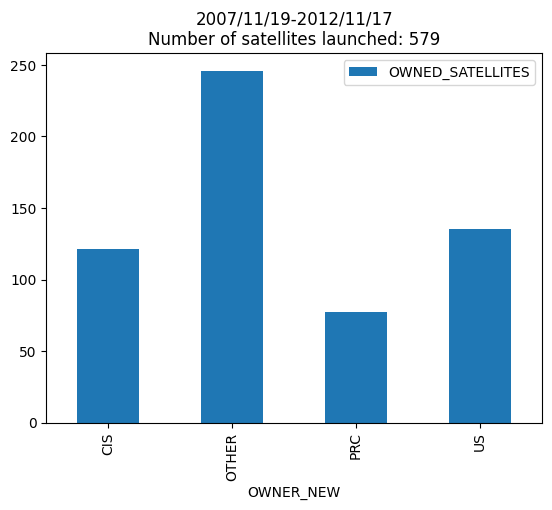

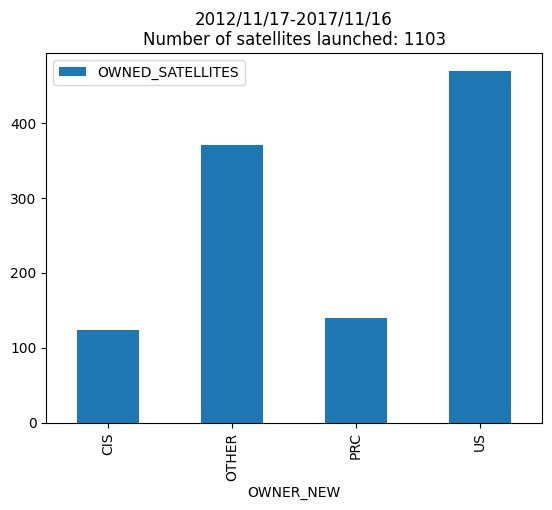

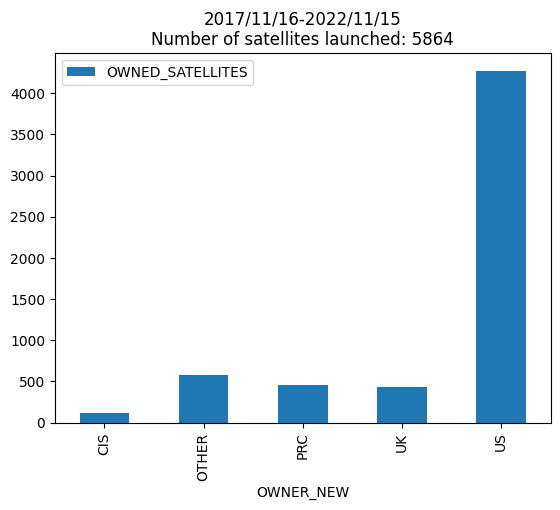

In [5]:
from datetime import timedelta, datetime

dt = timedelta(days=365 * 5)

start_date = datetime.fromisoformat("1957-12-01")
for i in range(13):
    end_date = start_date + dt
    filtered_df = df.loc[(df["LAUNCH_DATE"] >= start_date)
                    &  (df["LAUNCH_DATE"] < end_date)]
    title = start_date.strftime("%Y/%m/%d") + "-" + end_date.strftime("%Y/%m/%d") + "\n" + "Number of satellites launched: " + str(len(filtered_df))
    if i == 0:
        cutoff=0
    else:
        cutoff=50
    plot_sats(filtered_df, title = title, cutoff=cutoff)
    start_date = end_date
    

# Launch over the years statistics

## Large Overview Stuff

In [6]:
# DataFrame with Orbitclass, Year, and Satellites Launched
orbitclass_df = df.groupby(["LAUNCH_YEAR", "ORBIT_CLASS"], as_index=False).count().filter(["LAUNCH_YEAR", "ORBIT_CLASS", "OBJECT_ID"])
orbitclass_df.rename(columns = {"OBJECT_ID": "SATELLITES_LAUNCHED"}, inplace=True)
orbitclass_df = orbitclass_df.set_index(["LAUNCH_YEAR", "ORBIT_CLASS"])

# Creating synthetic dataset
start_year = 1957
dt_year = 66
years = [y for y in range(start_year, start_year + dt_year)]
years = years + years + years
years.sort()
orbit_classes = ["LEO", "MEO", "GSO"] * 66
synthetic_df = pd.DataFrame(
    {
        "LAUNCH_YEAR": years,
        "ORBIT_CLASS": orbit_classes,
        "SATELLITES_LAUNCHED": [0] * len(years)
    }
)
synthetic_df = synthetic_df.set_index(["LAUNCH_YEAR", "ORBIT_CLASS"])

orbitclass_df = orbitclass_df.join(synthetic_df, how="right", rsuffix="SYNTH").fillna(0).filter(["LAUNCH_YEAR", "ORBIT_CLASS", "SATELLITES_LAUNCHED"]).reset_index()
orbitclass_df

,LAUNCH_YEAR,ORBIT_CLASS,SATELLITES_LAUNCHED
0,1957,LEO,2.0
1,1957,MEO,0.0
2,1957,GSO,0.0
3,1958,LEO,5.0
4,1958,MEO,1.0
...,...,...,...
193,2021,MEO,7.0
194,2021,GSO,31.0
195,2022,LEO,1957.0
196,2022,MEO,17.0


(1957.0, 2022.0)

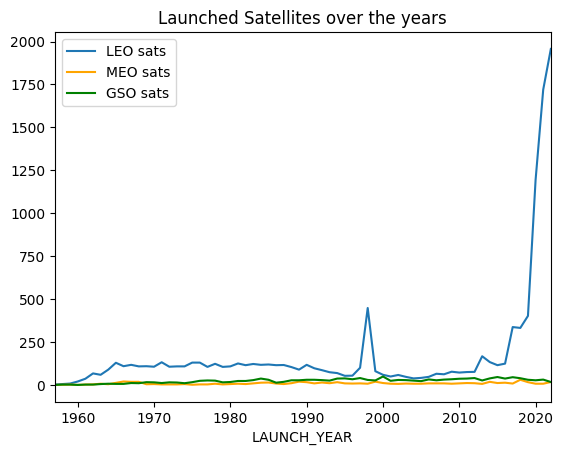

In [7]:
# Plotting
ax = orbitclass_df[orbitclass_df["ORBIT_CLASS"] == "LEO"].plot(title="Launched Satellites over the years", x="LAUNCH_YEAR", y="SATELLITES_LAUNCHED", label="LEO sats")

orbitclass_df[orbitclass_df["ORBIT_CLASS"] == "MEO"].plot(x="LAUNCH_YEAR", y="SATELLITES_LAUNCHED", color="orange", label="MEO sats", ax=ax)

orbitclass_df[orbitclass_df["ORBIT_CLASS"] == "GSO"].plot(x="LAUNCH_YEAR", y="SATELLITES_LAUNCHED", color="g", label="GSO sats", ax=ax)
ax.set_xlim(1957, 2022)

(1957.0, 2022.0)

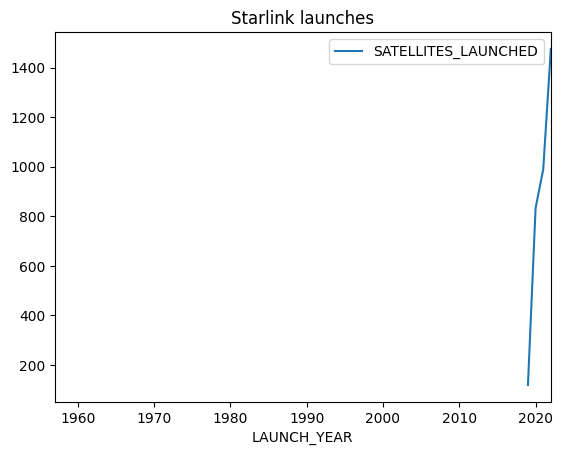

In [8]:
# This plot would give the same information but without the LEO/MEO/GSO distinction
df_count = df[df["OBJECT_CLASS"] == "STARLINK"].groupby(["LAUNCH_YEAR"], as_index=False).count().filter(["LAUNCH_YEAR", "OBJECT_ID"])
df_count.rename(columns = {"OBJECT_ID": "SATELLITES_LAUNCHED"}, inplace=True)
ax = df_count.plot(title="Starlink launches", x="LAUNCH_YEAR", y="SATELLITES_LAUNCHED")
ax.set_xlim(1957, 2022)

(1957.0, 2022.0)

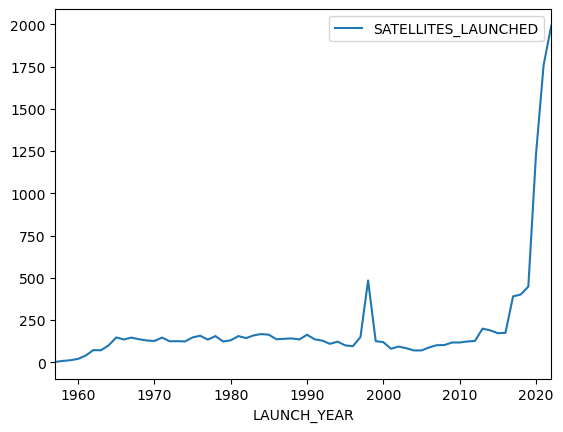

In [13]:
# This plot would give the same information but without the LEO/MEO/GSO distinction
df_count = df.groupby(["LAUNCH_YEAR"], as_index=False).count().filter(["LAUNCH_YEAR", "OBJECT_ID"])
df_count.rename(columns = {"OBJECT_ID": "SATELLITES_LAUNCHED"}, inplace=True)
ax = df_count.plot(x="LAUNCH_YEAR", y="SATELLITES_LAUNCHED")
ax.set_xlim(1957, 2022)

The explosion at the and of the 2010s is to be expected, but what is that peak in the year 1998?

If we take a closer look at the object classes of 1997 until 1999 we see the following:

```
Year 1997
   OBJECT_CLASS  SATELLITES_LAUNCHED
11      IRIDIUM                   46
24          STS                    8
1        COSMOS                    8
15      ORBCOMM                    8
17     PROGRESS                    4
9        GONETS                    3
4         DUMMY                    2
19        SOYUZ                    2
0      CELESTIS                    1
16      ORBVIEW                    1

Year 1998
    OBJECT_CLASS  SATELLITES_LAUNCHED
57         FLOCK                  110
79       IRIDIUM                   40
111      ORBCOMM                   18
110       OBJECT                   13
34        COSMOS                   11
87         LEMUR                   10
65    GLOBALSTAR                    8
202        YUZGU                    7
175    TECHEDSAT                    7
167          STS                    5

Year 1999
OBJECT_CLASS  SATELLITES_LAUNCHED
14   GLOBALSTAR                   28
24      ORBCOMM                    7
35          STS                    3
7        COSMOS                    3
26     PROGRESS                    2
17      IRIDIUM                    2
0       ABRIXAS                    1
30     SHENZHOU                    1
25       ORSTED                    1
27     QUIKSCAT                    1
```

## Object Class Shenanigans

In [60]:
df.dropna("DECAY_DATE")

/tmp/ipykernel_426508/2083298067.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna("DECAY_DATE")


ValueError: No axis named DECAY_DATE for object type DataFrame

In [79]:
type(df["DECAY_DATE"][4])

pandas._libs.tslibs.nattype.NaTType

In [95]:
import numpy as np
def aggregate_class(class_df):
    count_df = class_df.groupby(["OBJECT_CLASS"], as_index=False).count().filter(["OBJECT_CLASS", "OBJECT_ID"])
    count_df.rename(columns = {"OBJECT_ID": "SATELLITES_LAUNCHED"}, inplace=True)
    count_df.set_index("OBJECT_CLASS", inplace=True)
    
    temp_df = class_df.dropna(subset=["DECAY_DATE"])
    count2_df = class_df.drop(temp_df.index).filter(["OBJECT_CLASS", "OBJECT_ID"]).groupby(["OBJECT_CLASS"], as_index=False).count()
    count2_df.rename(columns = {"OBJECT_ID": "ACTIVE_SATELLITES"}, inplace=True)
    count2_df.set_index("OBJECT_CLASS", inplace=True)
    
    result_df = count_df.join(count2_df)
    result_df["ACTIVE_SATELLITES"] = result_df["ACTIVE_SATELLITES"].fillna(0).astype(int)
    result_df["INACTIVE_SATELLITES"] = result_df.apply(lambda row: row["SATELLITES_LAUNCHED"] - row["ACTIVE_SATELLITES"], axis=1)
    return result_df

def print_topN_classes(entire_df, year, N=5):
    filtered_df = entire_df[entire_df["LAUNCH_YEAR"] == year]

    count_df = aggregate_class(filtered_df)
    count_df = count_df.sort_values(["SATELLITES_LAUNCHED"], ascending=False)[:N]
    
    print(count_df)

start_year = 1957
end_year = 2023
#for year in range(start_year, end_year):
#    print("Year", year)
#    print_topN_classes(df[df["ORBIT_CLASS"] == "LEO"], year, N=5)

agg_df = aggregate_class(df)
agg_df.sort_values(["SATELLITES_LAUNCHED"], ascending=False)[:20]

,SATELLITES_LAUNCHED,ACTIVE_SATELLITES,INACTIVE_SATELLITES
OBJECT_CLASS,,,
STARLINK,3417,3176,241
COSMOS,2558,1149,1409
FLOCK,466,309,157
ONEWEB,428,426,2
OPS,412,169,243
USA,199,192,7
OBJECT,195,184,11
IRIDIUM,170,104,66
PROGRESS,167,0,167


In [22]:
start_year  = 1997
end_year    = 2000
for year in range(start_year, end_year):
    print("Year", year)
    print_topN_classes(df[df["ORBIT_CLASS"] == "LEO"], year, N=10)

Year 1997
   OBJECT_CLASS  SATELLITES_LAUNCHED
11      IRIDIUM                   46
24          STS                    8
1        COSMOS                    8
15      ORBCOMM                    8
17     PROGRESS                    4
9        GONETS                    3
4         DUMMY                    2
19        SOYUZ                    2
0      CELESTIS                    1
16      ORBVIEW                    1
Year 1998
    OBJECT_CLASS  SATELLITES_LAUNCHED
57         FLOCK                  110
79       IRIDIUM                   40
111      ORBCOMM                   18
110       OBJECT                   13
34        COSMOS                   11
87         LEMUR                   10
65    GLOBALSTAR                    8
202        YUZGU                    7
175    TECHEDSAT                    7
167          STS                    5
Year 1999
   OBJECT_CLASS  SATELLITES_LAUNCHED
14   GLOBALSTAR                   28
24      ORBCOMM                    7
35          STS                   

## Lifetime of Object Classes

In [61]:
decayed_df = df.dropna(subset=["DECAY_DATE"])
decayed_df["LIFETIME"] = decayed_df.apply(lambda row: row["DECAY_DATE"] - row["LAUNCH_DATE"], axis=1)

/tmp/ipykernel_426508/810433723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  decayed_df["LIFETIME"] = decayed_df.apply(lambda row: row["DECAY_DATE"] - row["LAUNCH_DATE"], axis=1)


In [62]:
mean_df = decayed_df.filter(["OBJECT_CLASS", "LIFETIME"]).groupby(["OBJECT_CLASS"], as_index=False).mean()
mean_df.set_index("OBJECT_CLASS", inplace=True)
count_df = decayed_df.filter(["OBJECT_CLASS", "OBJECT_ID"]).groupby(["OBJECT_CLASS"], as_index=False).count()
count_df.rename(columns = {"OBJECT_ID": "NUMBER"}, inplace=True)
#mean_df = mean_df.sort_values(["LIFETIME"], ascending=False)
count_df.set_index("OBJECT_CLASS", inplace=True)

decayed_classes_df = count_df.join(mean_df)
decayed_classes_df.sort_values("NUMBER", ascending=False)[:20]

,NUMBER,LIFETIME
OBJECT_CLASS,,
COSMOS,1409,757 days 13:29:25.507452096
OPS,243,712 days 07:12:35.555555552
STARLINK,241,420 days 18:43:19.170124480
PROGRESS,167,95 days 08:54:36.646706587
SOYUZ,164,139 days 15:39:30.731707318
FLOCK,157,4980 days 22:28:16.815286656
STS,135,13 days 06:02:40
MOLNIYA,128,4618 days 17:26:15
IRIDIUM,66,6880 days 07:16:21.818181760
